### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
# import nltk
# import re
# import string

In [2]:
import matplotlib.pyplot as plt
# import seaborn as sns

In [3]:
from nltk.corpus import stopwords
from nltk import word_tokenize
# from nltk.stem import LancasterStemmer
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.model_selection import train_test_split

In [4]:
import warnings
warnings.filterwarnings('ignore')

### Loading Data

In [5]:
data = pd.read_csv('data.csv')
data.head()

,Unnamed: 0,comment_text,hate
0,3366,dispute resolution what dispute resoluti...,0
1,23236,who the fuck would add prank edits that are sm...,1
2,158282,you are all a bunch of retarded idiots unfor...,1
3,98982,this is discussion thousands come here to ga...,1
4,10362,murray cod hi codman we have been through t...,0


Word Cloud

In [6]:
data.to_csv('MCCNN/data.csv')

In [7]:
stop = set(stopwords.words("english"))
def remove_stopwords(text):
    text = [word.lower() for word in text.split() if word.lower() not in stop]

    return " ".join(text)

In [8]:
data["comment_text"] = data["comment_text"].map(remove_stopwords)

In [9]:
data.comment_text

0        dispute resolution dispute resolution talking ...
1              fuck would add prank edits small inaccurate
2        bunch retarded idiots unfortunately cure stupi...
3        discussion thousands come gawk get answers uni...
4        murray cod hi codman making highly emotive sub...
                               ...                        
30252    troublemaker liar malicious scumbag looking tr...
30253                               saying think best talk
30254                      short clear slaves gas chambers
30255                   leave alone leave heck alone whore
30256    editing hi elizabeth people spend many hours e...
Name: comment_text, Length: 30257, dtype: object

### Tokenizing

In [10]:
def create_corpus(df):
    corpus = []
    for text in df["comment_text"]:
        words = [word.lower() for word in word_tokenize(text)]
        corpus.append(words)
    return corpus

In [11]:
corpus = create_corpus(data)
corpus

[['dispute',
  'resolution',
  'dispute',
  'resolution',
  'talking',
  'regarding',
  'comment',
  'wikipedia',
  'space',
  'dispute',
  'resolution',
  'applies',
  'dispute',
  'regarding',
  'article',
  'mainspace'],
 ['fuck', 'would', 'add', 'prank', 'edits', 'small', 'inaccurate'],
 ['bunch',
  'retarded',
  'idiots',
  'unfortunately',
  'cure',
  'stupidity',
  'obviously',
  'undereducated',
  'know',
  'read',
  'require',
  'evidence',
  'basic',
  'rules',
  'grammar',
  'wonder',
  'wikipedia',
  'laughing',
  'stock',
  'intelligent',
  'factual',
  'information'],
 ['discussion',
  'thousands',
  'come',
  'gawk',
  'get',
  'answers',
  'uninformed',
  'non',
  'experts',
  'stay',
  'home',
  'leave',
  'page',
  'alone',
  'right',
  'go',
  'churn',
  'butter',
  'pages',
  'business',
  'know',
  'nothing',
  'yr',
  'old',
  'xx'],
 ['murray',
  'cod',
  'hi',
  'codman',
  'making',
  'highly',
  'emotive',
  'subjective',
  'remarks',
  'article',
  'appropria

In [12]:
num_words = len(corpus)
num_words

30257

In [13]:
print(corpus[0])

['dispute', 'resolution', 'dispute', 'resolution', 'talking', 'regarding', 'comment', 'wikipedia', 'space', 'dispute', 'resolution', 'applies', 'dispute', 'regarding', 'article', 'mainspace']


In [14]:
train_size = int(data.shape[0] * 0.8)
train_size

24205

In [15]:
train_df = data[:train_size]
val_df = data[train_size:]

In [16]:
# split text and labels
train_texts = train_df.comment_text.to_numpy()
train_labels = train_df.hate.to_numpy()
val_texts = val_df.comment_text.to_numpy()
val_labels = val_df.hate.to_numpy()

In [17]:
train_texts

array(['dispute resolution dispute resolution talking regarding comment wikipedia space dispute resolution applies dispute regarding article mainspace',
       'fuck would add prank edits small inaccurate',
       'bunch retarded idiots unfortunately cure stupidity obviously undereducated know read require evidence basic rules grammar wonder wikipedia laughing stock intelligent factual information',
       ...,
       'blocked life forever life indefinitely trashy dustbin trashy dustbin blocked life life indefinitely obviously seen life reality hence carry editing pages wikipedia another big joke like fact jokers like make wikipedia unreliable piece crap world laughs thought block users edit articles wrongly written project good image like c grade item song sleaze actress payal rohatgi account edited write truth since work media knew actual truth knew best block accounts even foolish audacity write seem journalist block anyways went futile like remaining blocks users go future blocks g

In [18]:
train_texts.shape, train_labels.shape, val_texts.shape, val_labels.shape

((24205,), (24205,), (6052,), (6052,))

In [19]:
# Tokenize
from keras_preprocessing.text import Tokenizer

# vectorize a text corpus by turning each text into a sequence of integers
tokenizer = Tokenizer(num_words=len(train_texts))
tokenizer.fit_on_texts(train_texts) # fit only to training

In [20]:
train_sequences = tokenizer.texts_to_sequences(train_texts)
val_sequences = tokenizer.texts_to_sequences(val_texts)

In [21]:
# Pad the sequences to have the same length
from keras_preprocessing.sequence import pad_sequences

# Max number of words in a sequence
max_length = 50

train_padded = pad_sequences(train_sequences, maxlen=max_length, padding="post", truncating="post")
val_padded = pad_sequences(val_sequences, maxlen=max_length, padding="post", truncating="post")

In [22]:
train_padded

array([[ 674, 1481,  674, ...,    0,    0,    0],
       [   1,   10,  124, ...,    0,    0,    0],
       [ 712,  479,  806, ...,    0,    0,    0],
       ...,
       [  81,   64, 1151, ...,  269, 2697, 2584],
       [  37, 4447,   19, ...,    0,    0,    0],
       [ 190, 3298,  435, ...,    0,    0,    0]])

In [23]:
val_padded

array([[  11,  124,  243, ...,    0,    0,    0],
       [  11, 2722,    2, ...,    0,    0,    0],
       [1015,  594,   23, ...,    0,    0,    0],
       ...,
       [ 752,  296, 4784, ...,    0,    0,    0],
       [ 167,  334,  167, ...,    0,    0,    0],
       [  60,   37, 4195, ...,    0,    0,    0]])

In [24]:
print(train_texts[0])
print(train_sequences[0])
print(train_padded[0])

dispute resolution dispute resolution talking regarding comment wikipedia space dispute resolution applies dispute regarding article mainspace
[674, 1481, 674, 1481, 385, 455, 130, 2, 957, 674, 1481, 2570, 674, 455, 3, 5280]
[ 674 1481  674 1481  385  455  130    2  957  674 1481 2570  674  455
    3 5280    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0]


In [25]:
word_index = tokenizer.word_index
print("No of unique words:", len(word_index))

No of unique words: 51261


### Embedding Dictionary

In [26]:
from pickle import load
from keras.models import Model
from keras.layers import *
from keras.utils.vis_utils import plot_model
# from keras.layers.convolutional import Conv1D
# from keras.layers.convolutional import MaxPooling1D
# from keras.layers import concatenate

In [27]:
def define_model(length, vocab_size):
    #Channel 1
    input1 = Input(shape=(length,))
    embedding1 = Embedding(vocab_size, 100)(input1)
    conv1 = Conv1D(32, 2, activation="relu")(embedding1)
    drop1 = Dropout(0.5)(conv1)
    pool1 = MaxPooling1D(pool_size=2)(drop1)
    flat1 = Flatten()(pool1)

    #Channel 2
    input2 = Input(shape=(length,))
    embedding2 = Embedding(vocab_size, 100)(input2)
    conv2 = Conv1D(32, 3, activation="relu")(embedding2)
    drop2 = Dropout(0.5)(conv2)
    pool2 = MaxPooling1D(pool_size=2)(drop2)
    flat2 = Flatten()(pool2)

    #Channel 3
    input3 = Input(shape=(length,))
    embedding3 = Embedding(vocab_size, 100)(input3)
    conv3 = Conv1D(32, 4, activation="relu")(embedding3)
    drop3 = Dropout(0.5)(conv3)
    pool3 = MaxPooling1D(pool_size=2)(drop3)
    flat3 = Flatten()(pool3)

    # merge
    merged = concatenate([flat1, flat2, flat3])

    # interpretation
    dense1 = Dense(8, activation='relu')(merged)
    outputs = Dense(1, activation='sigmoid')(dense1)
    model = Model(inputs=[input1, input2, input3], outputs=outputs)

    # compile
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # summarize
    model.summary()
    return model

In [28]:
vocab_size = len(tokenizer.word_index) + 1

In [29]:
model = define_model(max_length, vocab_size=vocab_size)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 50)]         0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 50)]         0           []                               
                                                                                                  
 input_3 (InputLayer)           [(None, 50)]         0           []                               
                                                                                                  
 embedding (Embedding)          (None, 50, 100)      5126200     ['input_1[0][0]']                
                                                                                              

In [30]:
# model.compile(loss="binary_crossentropy", optimizer="adam", metrics="accuracy")
model.fit([train_padded,train_padded,train_padded], train_labels, epochs=5, batch_size=16, verbose=2)

Epoch 1/5
1513/1513 - 170s - loss: 0.3101 - accuracy: 0.8605 - 170s/epoch - 112ms/step
Epoch 2/5
1513/1513 - 170s - loss: 0.1272 - accuracy: 0.9523 - 170s/epoch - 113ms/step
Epoch 3/5
1513/1513 - 163s - loss: 0.0508 - accuracy: 0.9824 - 163s/epoch - 108ms/step
Epoch 4/5
1513/1513 - 164s - loss: 0.0209 - accuracy: 0.9933 - 164s/epoch - 108ms/step
Epoch 5/5
1513/1513 - 163s - loss: 0.0142 - accuracy: 0.9955 - 163s/epoch - 108ms/step


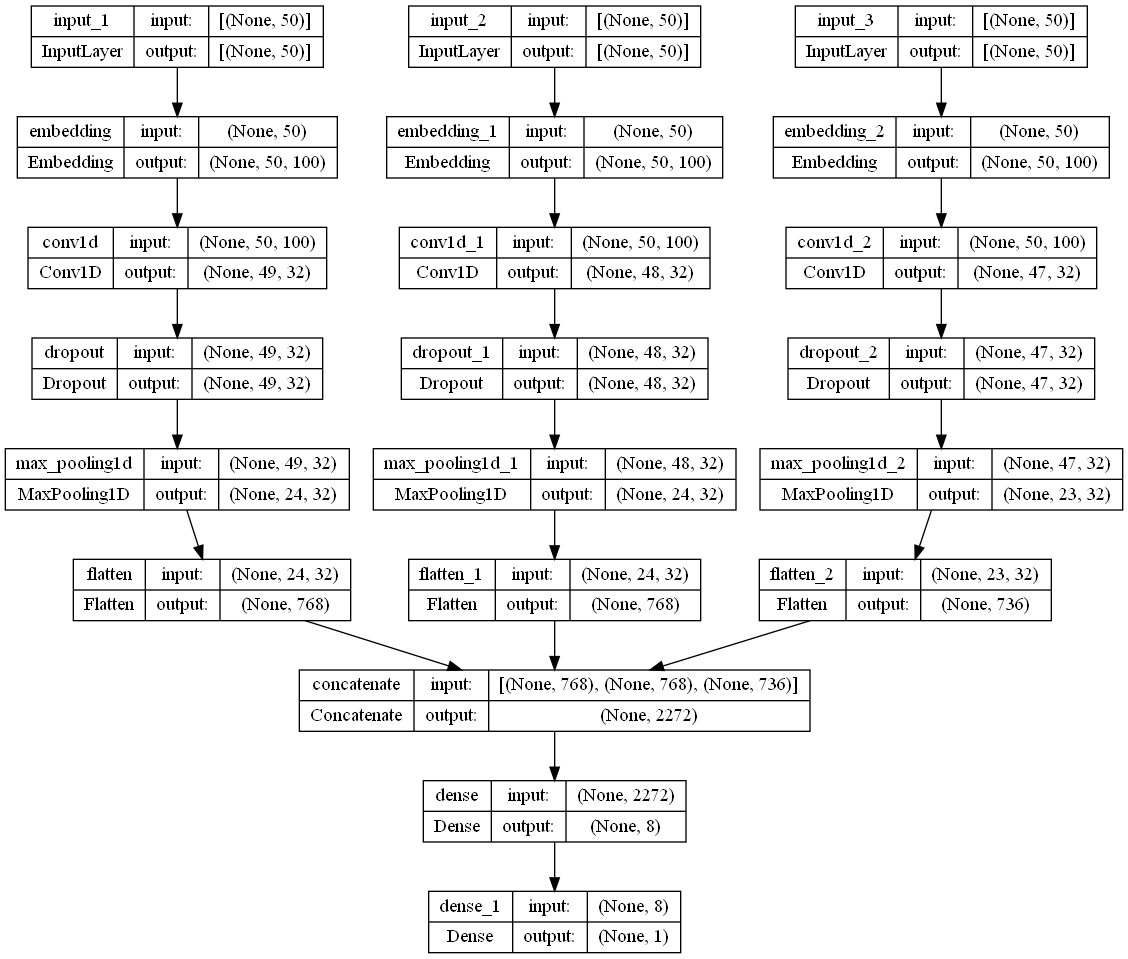

In [31]:
from keras.utils.vis_utils import plot_model
plot_model(model, show_shapes=True, to_file='MCCNN/multichannel.png')

In [101]:
from keras.models import model_from_json

In [102]:
# serialize model to JSON
model_json = model.to_json()
with open("MCCNN/model.json", "w") as json_file:
    json_file.write(model_json)

In [103]:
# serialize weights to HDF5
model.save_weights("MCCNN/model.h5")
print("Saved model to disk")

Saved model to disk


In [35]:
string = ["Kill all niggers."]

In [36]:
string_sequences = tokenizer.texts_to_sequences(string)

In [37]:
string_padded = pad_sequences(string_sequences, maxlen=max_length, padding="post", truncating="post")

In [38]:
predictions = model.predict([string_padded, string_padded, string_padded])
predictions

1/1 [==============================] - 0s 188ms/step


array([[0.99988425]], dtype=float32)

Sentiment Analysis

In [39]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [40]:
sa = SentimentIntensityAnalyzer()

In [41]:
compound_score = sa.polarity_scores(string[0])

In [42]:
compound_score

{'neg': 0.701, 'neu': 0.299, 'pos': 0.0, 'compound': -0.6908}

In [43]:
if((compound_score['compound'] <= -0.5) and (predictions[0] >= 0.8)):
    print("Hate Speech Detected!")

Hate Speech Detected!
